In [38]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
def phase_randomization(time_series):
    # Compute the Fourier transform of the time series
    fourier_transform = np.fft.fft(time_series)

    # Get the phases of the Fourier transform
    phases = np.angle(fourier_transform)

    # Shuffle the phases randomly
    np.random.shuffle(phases)

    # Apply the shuffled phases to the Fourier transform
    randomized_fourier_transform = np.abs(fourier_transform) * np.exp(1j * phases)

    # Reconstruct the randomized time series
    randomized_time_series = np.fft.ifft(randomized_fourier_transform)

    # Return the randomized time series
    return randomized_time_series.real

def phase_randomization_dataframe_fixed(df):
    df_dropped = df#.drop(df.columns[-1], axis=1)  # Drop the last column from the dataframe

    ##randomized_df = pd.DataFrame()  # Create an empty dataframe to store the randomized data
    L=[]
    for _, row in df_dropped.iterrows():
        randomized_row = phase_randomization(row.values)
        L.append(randomized_row)# Apply phase randomization to each row
        #randomized_df = randomized_df.concat(pd.Series(randomized_row), ignore_index=True)  # Add randomized row to the dataframe
    #randomized_df.columns = df_dropped.columns  # Assign the column names to the randomized dataframe
    #randomized_df=pd.concat(L)
    return pd.DataFrame(L)#randomized_df

In [32]:
# Path for REST1 real time series
path = glob.glob("C:\\Users\\cyril\\Documents\\MSc Physics and Astronomy\\Thesis\\GitHub\\Young_Adults_time_series\\*REST1*.txt")

# Import and save real time series
filename=path[0]
df=pd.read_csv(filename,sep='\t',header=None)
df.to_csv('TimeSeries_REAL/REST1/REAL_'+filename[-103:], sep='\t', index=False, header=False)

# Create and save PR time series
df = phase_randomization_dataframe_fixed(df)
df.to_csv('TimeSeries_PR/REST1/PR_'+filename[-103:], sep='\t', index=False, header=False)

In [33]:
# Import the stored PR and real time series to compare their distribution
timeseries_REAL=pd.read_csv('TimeSeries_REAL\REST1\REAL_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep='\t',header=None)
timeseries_PR=pd.read_csv('TimeSeries_PR\REST1\PR_100206_rfMRI_REST1_Atlas_MSMAll_hp2000_clean_Schaefer2018_100Parcels_7Networks_Tian_Subcortex_S1_3T.txt',sep='\t',header=None)

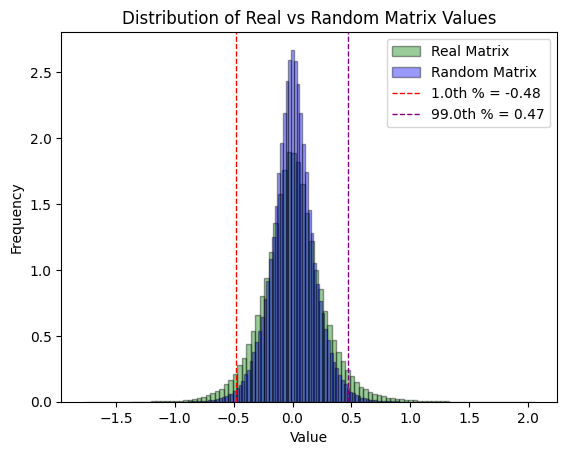

In [39]:
# Flatten the matrices
real_corr_flat = np.array(timeseries_REAL).flatten()
random_corr_flat = np.array(timeseries_PR).flatten()

# Plot the distribution of correlation values for real vs random data
plt.hist(real_corr_flat, density=True, bins=100, label='Real Matrix', alpha=0.4, color='green', edgecolor='black')
plt.hist(random_corr_flat, density=True, bins=100, label='Random Matrix', alpha=0.4, color='blue', edgecolor='black')

# Calculate percentiles
q010 = np.quantile(random_corr_flat, 0.010)
q990 = np.quantile(random_corr_flat, 0.990)

# Draw red dotted lines at the 1.0th and 99.0th percentiles
plt.axvline(q010, color='red', linestyle='--', linewidth=1, label=f'1.0th % = {q010:.2f}')
plt.axvline(q990, color='purple', linestyle='--', linewidth=1, label=f'99.0th % = {q990:.2f}')

# Add legend to the plot
plt.legend()

# Optional: Add titles and labels
plt.title('Distribution of Real vs Random Matrix Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()